# 1. Importing necessary libraries

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# 2. Load dataset

In [229]:
sal_train = pd.read_csv('SalaryData_Train.csv')
sal_test = pd.read_csv('SalaryData_Test.csv')

# 3. EDA

In [128]:
sal_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
sal_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [7]:
sal_train['Salary'].nunique()

2

In [8]:
sal_train['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [27]:
sal_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary            int64
dtype: object

In [38]:
sal_train['Salary'].value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [46]:
sal_test['Salary'].value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

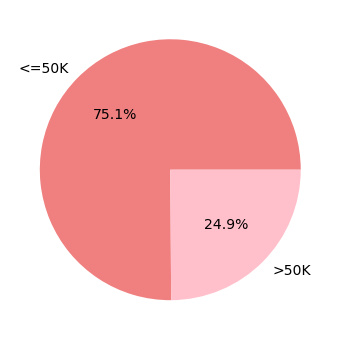

In [53]:
plt.figure(figsize=(6,6))
plt.pie(sal_train['Salary'].value_counts(),labels=['<=50K','>50K'],autopct='%1.1f%%',colors=['lightcoral','pink'],textprops={'fontsize':14})
plt.show()

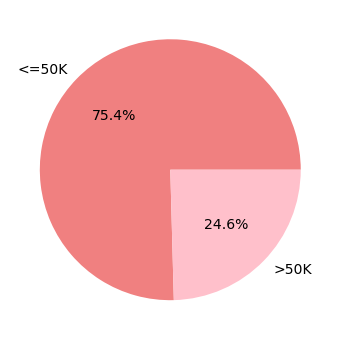

In [54]:
plt.figure(figsize=(6,6))
plt.pie(sal_test['Salary'].value_counts(),labels=['<=50K','>50K'],autopct='%1.1f%%',colors=['lightcoral','pink'],textprops={'fontsize':14})
plt.show()

## Findinf categorical variables

In [230]:
categorical = [i for i in sal_train.columns if sal_train[i].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [231]:
for i in categorical:
    print(sal_train[i].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

## Check for cardinality in each categorical variables

In [238]:
for i in categorical:
    
    print(i, 'contains ', sal_train[i].nunique(), ' labels...')

workclass contains  7  labels...
education contains  16  labels...
maritalstatus contains  7  labels...
occupation contains  14  labels...
relationship contains  6  labels...
race contains  5  labels...
sex contains  2  labels...
native contains  40  labels...
Salary contains  2  labels...


# 4. Data Preprocessing

In [107]:
le=LabelEncoder()

In [130]:
def encoding(i):
    cols = sal_train.columns
    sal_train[cols[i]]=le.fit_transform(sal_train[cols[i]])
    sal_test[cols[i]]=le.fit_transform(sal_test[cols[i]])

In [131]:
a = [1,2,4,5,6,7,8,12,13]
for i in a:
    encoding(i)
sal_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [132]:
sal_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


# 5. Model Building

In [133]:
X_train = sal_train.drop('Salary',axis=1)
y_train = sal_train[['Salary']]
X_test = sal_test.drop('Salary',axis=1)
y_test = sal_test[['Salary']]

In [134]:
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [135]:
y_train

,Salary
0,0
1,0
2,0
3,0
4,0
...,...
30156,0
30157,1
30158,0
30159,0


# 6. Model Training | 7. Model Testing | 8. Model Evaluation

## Using Gaussian Naive Bayes

In [265]:
nb_model = GaussianNB()

In [271]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [272]:
y_pred = nb_model.predict(X_test)

In [273]:
nb_model.score(X_train,y_train)

0.7902257882696198

In [274]:
nb_model.score(X_test,y_test)

0.7907702523240372

In [275]:
accuracy_score(y_test,y_pred)

0.7907702523240372

## Using Multinomial Naive Bayes

In [257]:
mnb_model = MultinomialNB()

In [258]:
mnb_model.fit(X_train,y_train)

MultinomialNB()

In [259]:
y_pred_mnb = mnb_model.predict(X_test)

In [260]:
y_pred_mnb

array([0, 0, 0, ..., 0, 1, 0])

In [261]:
mnb_model.score(X_train,y_train)

0.7729186698053778

In [262]:
mnb_model.score(X_test,y_test)

0.7749667994687915

In [264]:
accuracy_score(y_test,y_pred_mnb)

0.7749667994687915

## Gaussian Naive Bayes is giving slightly more accuracy than Multinomial Naive Bayes algorithm

# 9. Feature Engineering

### Feature selection using SelectFromModel and RFE will not work as Naive Bayes algorithm does not have feature importance parameter which is required by the 2 methods for selecting important features 

### Feature Selection using correlation

In [166]:
sal_train.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.080537,-0.001091,0.043525,-0.276363,-0.005682,-0.246452,0.023380,0.081972,0.080152,0.060278,0.101598,-0.001548,0.241991
workclass,0.080537,1.000000,0.017864,0.037833,-0.034235,0.015572,-0.067414,0.044734,0.074966,0.035349,0.007244,0.050723,0.007598,0.018040
education,-0.001091,0.017864,1.000000,0.345420,-0.040704,-0.038213,-0.012732,0.011139,-0.027831,0.030582,0.014822,0.059892,0.079715,0.079013
educationno,0.043525,0.037833,0.345420,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006155,0.124416,0.079691,0.152522,0.092625,0.335287
maritalstatus,-0.276363,-0.034235,-0.040704,-0.063419,1.000000,0.022655,0.177955,-0.068641,-0.119774,-0.042414,-0.035385,-0.189004,-0.026057,-0.193504
occupation,-0.005682,0.015572,-0.038213,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062316,0.022162,0.014612,0.018365,-0.003298,0.051577
relationship,-0.246452,-0.067414,-0.012732,-0.091935,0.177955,-0.053727,1.000000,-0.117148,-0.584881,-0.058257,-0.063659,-0.257850,-0.010661,-0.250998
race,0.023380,0.044734,0.011139,0.032805,-0.068641,0.000717,-0.117148,1.000000,0.089207,0.014355,0.023461,0.048533,0.126507,0.071666
sex,0.081972,0.074966,-0.027831,0.006155,-0.119774,0.062316,-0.584881,0.089207,1.000000,0.048809,0.047285,0.231272,0.000063,0.216680
capitalgain,0.080152,0.035349,0.030582,0.124416,-0.042414,0.022162,-0.058257,0.014355,0.048809,1.000000,-0.032218,0.080431,0.008513,0.221195


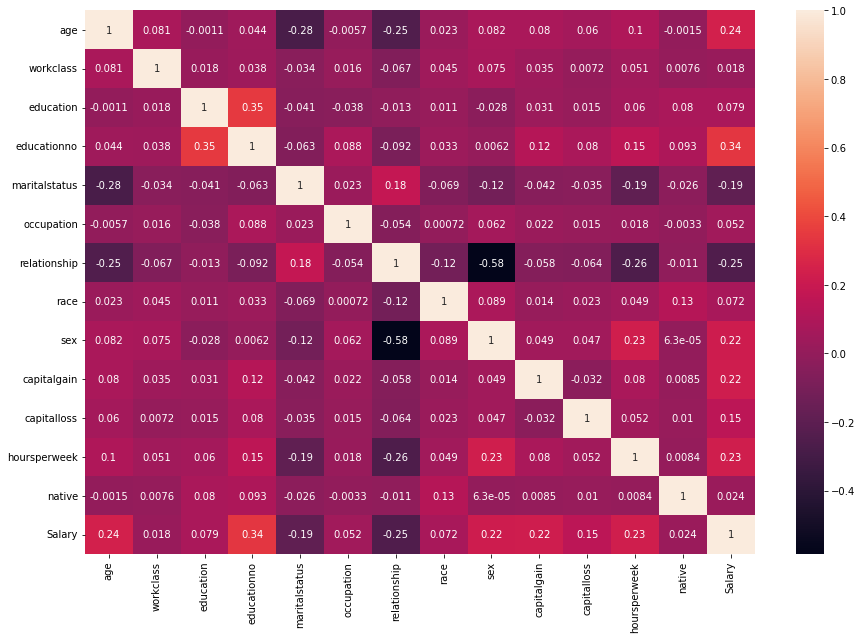

In [170]:
plt.figure(figsize=(15,10))
sns.heatmap(sal_train.corr(),annot=True)
plt.show()

In [199]:
train = sal_train.drop(['workclass','educationno','race','sex','native'],axis=1)
train

,age,education,maritalstatus,occupation,relationship,capitalgain,capitalloss,hoursperweek,Salary
0,39,9,4,0,1,2174,0,40,0
1,50,9,2,3,0,0,0,13,0
2,38,11,0,5,1,0,0,40,0
3,53,1,2,5,0,0,0,40,0
4,28,9,2,9,5,0,0,40,0
...,...,...,...,...,...,...,...,...,...
30156,27,7,2,12,5,0,0,38,0
30157,40,11,2,6,0,0,0,40,1
30158,58,11,6,0,4,0,0,40,0
30159,22,11,4,0,3,0,0,20,0


In [200]:
test = sal_test.drop(['workclass','educationno','race','sex','native'],axis=1)
test

,age,education,maritalstatus,occupation,relationship,capitalgain,capitalloss,hoursperweek,Salary
0,25,1,4,6,3,0,0,40,0
1,38,11,2,4,0,0,0,50,0
2,28,7,2,10,0,0,0,40,1
3,44,15,2,6,0,7688,0,40,1
4,34,0,4,7,1,0,0,30,0
...,...,...,...,...,...,...,...,...,...
15055,33,9,4,9,3,0,0,40,0
15056,39,9,0,9,1,0,0,36,0
15057,38,9,2,9,0,0,0,50,0
15058,44,9,0,0,3,5455,0,40,0


In [201]:
X_train = train.drop('Salary',axis=1)
y_train = train[['Salary']]
X_test = test.drop('Salary',axis=1)
y_test = test[['Salary']]

In [202]:
nb_model = GaussianNB()

In [203]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [204]:
y_pred = nb_model.predict(X_test)

In [205]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [207]:
nb_model.score(X_train,y_train)

0.7902257882696198

In [208]:
nb_model.score(X_test,y_test)

0.7907702523240372

# 10. Feature Scaling to Improve Model Accuracy

In [221]:
scale = MinMaxScaler()
# StandardScaler()

In [222]:
X_train_scaled = scale.fit_transform(X_train)
X_train_scaled

array([[0.30136986, 0.6       , 0.66666667, ..., 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.6       , 0.33333333, ..., 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.73333333, 0.        , ..., 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.73333333, 1.        , ..., 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.73333333, 0.66666667, ..., 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.73333333, 0.33333333, ..., 0.1502415 , 0.        ,
        0.39795918]])

In [223]:
X_test_scaled = scale.fit_transform(X_test)
X_test_scaled

array([[0.10958904, 0.06666667, 0.66666667, ..., 0.        , 0.        ,
        0.39795918],
       [0.28767123, 0.73333333, 0.33333333, ..., 0.        , 0.        ,
        0.5       ],
       [0.15068493, 0.46666667, 0.33333333, ..., 0.        , 0.        ,
        0.39795918],
       ...,
       [0.28767123, 0.6       , 0.33333333, ..., 0.        , 0.        ,
        0.5       ],
       [0.36986301, 0.6       , 0.        , ..., 0.05455055, 0.        ,
        0.39795918],
       [0.24657534, 0.6       , 0.33333333, ..., 0.        , 0.        ,
        0.60204082]])

In [224]:
nb_model.fit(X_train_scaled,y_train)

GaussianNB()

In [225]:
y_pred = nb_model.predict(X_test_scaled)

In [226]:
nb_model.score(X_train_scaled,y_train)

0.7905241868638307

In [227]:
nb_model.score(X_test_scaled,y_test)

0.7901726427622842

### Even after feature scaling, the accuracy of the gaussian model is not improving

# Confusion Matrix

In [241]:
print(confusion_matrix(y_test,y_pred))

[[10762   598]
 [ 2562  1138]]


<AxesSubplot:>

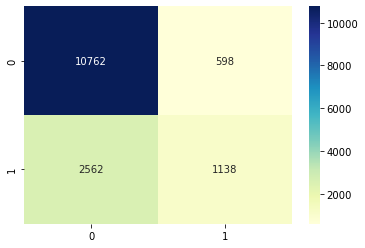

In [244]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='YlGnBu')

# Classification Report

In [246]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.66      0.31      0.42      3700

    accuracy                           0.79     15060
   macro avg       0.73      0.63      0.65     15060
weighted avg       0.77      0.79      0.76     15060

